In [2]:
from datasets import load_dataset
import pandas as pd

# Load the CNN/Daily Mail dataset
dataset = load_dataset("cnn_dailymail", "3.0.0")

# Inspect the dataset structure
print(dataset)
print(dataset['train'][0])

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})
{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. 

In [4]:
import re

def preprocess_text(text):
    # Remove special characters and extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply preprocessing to the dataset
dataset = dataset.map(lambda examples: {'article': preprocess_text(examples['article']),
                                         'highlights': preprocess_text(examples['highlights'])})

# Format the data for a general model input structure
# This is a basic example; specific models may require different formatting
def format_for_model(examples):
    return {'input_text': examples['article'], 'target_text': examples['highlights']}

dataset = dataset.map(format_for_model)

# Display a processed example
print(dataset['train'][0])

Map:   0%|          | 0/287113 [00:00<?, ? examples/s]

Map:   0%|          | 0/13368 [00:00<?, ? examples/s]

Map:   0%|          | 0/11490 [00:00<?, ? examples/s]

Map:   0%|          | 0/287113 [00:00<?, ? examples/s]

Map:   0%|          | 0/13368 [00:00<?, ? examples/s]

Map:   0%|          | 0/11490 [00:00<?, ? examples/s]

{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office char

In [1]:
from transformers import BartTokenizer, BartForConditionalGeneration, PegasusTokenizer, PegasusForConditionalGeneration, T5Tokenizer, T5ForConditionalGeneration, TrainingArguments, Trainer

# --- BART ---
bart_model_name = 'bart-large'
try:
    bart_tokenizer = BartTokenizer.from_pretrained(bart_model_name)
    bart_model = BartForConditionalGeneration.from_pretrained(bart_model_name)
    print(f"BART model '{bart_model_name}' loaded successfully.")
except Exception as e:
    print(f"Error loading BART model '{bart_model_name}': {e}")


# --- PEGASUS ---
pegasus_model_name = 'google/pegasus-cnn_dailymail'
try:
    pegasus_tokenizer = PegasusTokenizer.from_pretrained(pegasus_model_name)
    pegasus_model = PegasusForConditionalGeneration.from_pretrained(pegasus_model_name)
    print(f"PEGASUS model '{pegasus_model_name}' loaded successfully.")
except Exception as e:
    print(f"Error loading PEGASUS model '{pegasus_model_name}': {e}")


# --- T5 (base and large) ---
t5_base_model_name = 't5-base'
try:
    t5_base_tokenizer = T5Tokenizer.from_pretrained(t5_base_model_name)
    t5_base_model = T5ForConditionalGeneration.from_pretrained(t5_base_model_name)
    print(f"T5 base model '{t5_base_model_name}' loaded successfully.")
except Exception as e:
    print(f"Error loading T5 base model '{t5_base_model_name}': {e}")


t5_large_model_name = 't5-large'
try:
    t5_large_tokenizer = T5Tokenizer.from_pretrained(t5_large_model_name)
    t5_large_model = T5ForConditionalGeneration.from_pretrained(t5_large_model_name)
    print(f"T5 large model '{t5_large_model_name}' loaded successfully.")
except Exception as e:
    print(f"Error loading T5 large model '{t5_large_model_name}': {e}")


# Example of setting up training arguments (will be modified for each model)
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,  # Reduced for demonstration
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none" # Disable reporting for this example
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Error loading BART model 'bart-large': bart-large is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `hf auth login` or by passing `token=<your_token>`


tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

PEGASUS model 'google/pegasus-cnn_dailymail' loaded successfully.


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

T5 base model 't5-base' loaded successfully.


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

T5 large model 't5-large' loaded successfully.


In [2]:
# Remove problematic imports and keep only the successful ones
from transformers import BartTokenizer, BartForConditionalGeneration, PegasusTokenizer, PegasusForConditionalGeneration, T5Tokenizer, T5ForConditionalGeneration, TrainingArguments, Trainer

# --- BART ---
bart_model_name = 'bart-large-cnn' # Use a specific summarization checkpoint
try:
    bart_tokenizer = BartTokenizer.from_pretrained(bart_model_name)
    bart_model = BartForConditionalGeneration.from_pretrained(bart_model_name)
    print(f"BART model '{bart_model_name}' loaded successfully.")
except Exception as e:
    print(f"Error loading BART model '{bart_model_name}': {e}")

# --- PEGASUS ---
pegasus_model_name = 'google/pegasus-cnn_dailymail'
try:
    pegasus_tokenizer = PegasusTokenizer.from_pretrained(pegasus_model_name)
    pegasus_model = PegasusForConditionalGeneration.from_pretrained(pegasus_model_name)
    print(f"PEGASUS model '{pegasus_model_name}' loaded successfully.")
except Exception as e:
    print(f"Error loading PEGASUS model '{pegasus_model_name}': {e}")

# --- T5 (base and large) ---
t5_base_model_name = 't5-base'
try:
    t5_base_tokenizer = T5Tokenizer.from_pretrained(t5_base_model_name)
    t5_base_model = T5ForConditionalGeneration.from_pretrained(t5_base_model_name)
    print(f"T5 base model '{t5_base_model_name}' loaded successfully.")
except Exception as e:
    print(f"Error loading T5 base model '{t5_base_model_name}': {e}")

t5_large_model_name = 't5-large'
try:
    t5_large_tokenizer = T5Tokenizer.from_pretrained(t5_large_model_name)
    t5_large_model = T5ForConditionalGeneration.from_pretrained(t5_large_model_name)
    print(f"T5 large model '{t5_large_model_name}' loaded successfully.")
except Exception as e:
    print(f"Error loading T5 large model '{t5_large_model_name}': {e}")

# --- LongT5 ---
# LongT5 uses T5Tokenizer
longt5_model_name = 'google/longt5-local-base' # Example, may need adjustment
try:
    longt5_tokenizer = T5Tokenizer.from_pretrained(longt5_model_name) # Use T5Tokenizer
    longt5_model = T5ForConditionalGeneration.from_pretrained(longt5_model_name) # LongT5 is a variant of T5
    print(f"LongT5 model '{longt5_model_name}' loaded successfully.")
except Exception as e:
    print(f"Error loading LongT5 model '{longt5_model_name}': {e}")

# --- Models requiring custom implementation or external libraries ---
print("\nThe following models require finding specific implementations or external libraries:")
print("- PRIMERA")
print("- Absformer")
print("- Graph-based Neural Networks for MDS (e.g., TG-MultiSum)")
print("- Hierarchical Transformer Models")
print("- Deep Communicating Agents (DCA)")
print("- Models with External Knowledge Incorporation")

# Example of setting up training arguments (corrected again)
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,  # Reduced for demonstration
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="steps",
    save_steps=10,
    load_best_model_at_end=True,
    report_to="none" # Disable reporting for this example
)

print("\nTrainingArguments configured successfully.")


Error loading BART model 'bart-large-cnn': bart-large-cnn is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `hf auth login` or by passing `token=<your_token>`


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


PEGASUS model 'google/pegasus-cnn_dailymail' loaded successfully.


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


T5 base model 't5-base' loaded successfully.
T5 large model 't5-large' loaded successfully.


You are using a model of type longt5 to instantiate a model of type t5. This is not supported for all configurations of models and can yield errors.
Some weights of T5ForConditionalGeneration were not initialized from the model checkpoint at google/longt5-local-base and are newly initialized: ['encoder.block.0.layer.0.SelfAttention.k.weight', 'encoder.block.0.layer.0.SelfAttention.o.weight', 'encoder.block.0.layer.0.SelfAttention.q.weight', 'encoder.block.0.layer.0.SelfAttention.relative_attention_bias.weight', 'encoder.block.0.layer.0.SelfAttention.v.weight', 'encoder.block.1.layer.0.SelfAttention.k.weight', 'encoder.block.1.layer.0.SelfAttention.o.weight', 'encoder.block.1.layer.0.SelfAttention.q.weight', 'encoder.block.1.layer.0.SelfAttention.v.weight', 'encoder.block.10.layer.0.SelfAttention.k.weight', 'encoder.block.10.layer.0.SelfAttention.o.weight', 'encoder.block.10.layer.0.SelfAttention.q.weight', 'encoder.block.10.layer.0.SelfAttention.v.weight', 'encoder.block.11.layer.0.Sel

LongT5 model 'google/longt5-local-base' loaded successfully.

The following models require finding specific implementations or external libraries:
- PRIMERA
- Absformer
- Graph-based Neural Networks for MDS (e.g., TG-MultiSum)
- Hierarchical Transformer Models
- Deep Communicating Agents (DCA)
- Models with External Knowledge Incorporation

TrainingArguments configured successfully.


In [3]:
from datasets import load_dataset
from transformers import pipeline
from rouge_score import rouge_scorer
import numpy as np

# Load small dataset subset
dataset = load_dataset("cnn_dailymail", "3.0.0", split="validation[:3]")  # just 3 samples for speed

# Function to evaluate a model quickly
def evaluate_model(model_name, tokenizer_class, model_class):
    try:
        summarizer = pipeline("summarization", model=model_name, tokenizer=model_name, framework="pt")
        references, predictions = [], []

        for sample in dataset:
            text = sample['article']
            ref = sample['highlights']
            pred = summarizer(text, max_length=60, min_length=20, truncation=True)[0]['summary_text']
            references.append(ref)
            predictions.append(pred)

        # ROUGE scoring
        scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
        rouge_scores = {"rouge1": [], "rouge2": [], "rougeL": []}
        for ref, pred in zip(references, predictions):
            scores = scorer.score(ref, pred)
            for key in rouge_scores:
                rouge_scores[key].append(scores[key].fmeasure)

        avg_scores = {k: np.mean(v) for k, v in rouge_scores.items()}
        print(f"\nModel: {model_name}")
        for k, v in avg_scores.items():
            print(f"{k}: {v:.4f}")

        return avg_scores
    except Exception as e:
        print(f"Error with {model_name}: {e}")
        return None


# Run evaluations very quickly
results = {}
#results["BART"] = evaluate_model("facebook/bart-large-cnn", BartTokenizer, BartForConditionalGeneration)
results["PEGASUS"] = evaluate_model("google/pegasus-cnn_dailymail", PegasusTokenizer, PegasusForConditionalGeneration)
results["T5-base"] = evaluate_model("t5-base", T5Tokenizer, T5ForConditionalGeneration)
#results["T5-large"] = evaluate_model("t5-large", T5Tokenizer, T5ForConditionalGeneration)
#results["LongT5"] = evaluate_model("google/longt5-local-base", T5Tokenizer, T5ForConditionalGeneration)

# You already did PRIMERA separately


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu



Model: google/pegasus-cnn_dailymail
rouge1: 0.2805
rouge2: 0.0672
rougeL: 0.1974


Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



Model: t5-base
rouge1: 0.3338
rouge2: 0.1192
rougeL: 0.2473


In [12]:
from datasets import load_dataset
from transformers import BartTokenizer, BartForConditionalGeneration, pipeline
import evaluate

# 1. Load dataset (CNN/DailyMail)
dataset = load_dataset("cnn_dailymail", "3.0.0")

# 2. Take tiny subset (3 samples)
tiny_eval_dataset = dataset["validation"].select(range(3))

# 3. Load BART model + tokenizer
model_name = "facebook/bart-base"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)
model.to("cpu")  # ensure CPU usage

# 4. Build summarization pipeline (with truncation)
summarizer = pipeline(
    "summarization",
    model=model,
    tokenizer=tokenizer,
    device=-1  # -1 = CPU
)

# 5. Run summarization
predictions, references = [], []
for sample in tiny_eval_dataset:
    # tokenize with truncation
    inputs = tokenizer(
        sample["article"],
        max_length=1024,   # truncate to BART max length
        truncation=True,
        return_tensors="pt"
    )

    # generate summary
    summary_ids = model.generate(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        max_length=60,
        min_length=10,
        num_beams=4,
        early_stopping=True
    )

    pred = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    predictions.append(pred)
    references.append(sample["highlights"])

# 6. Compute ROUGE
rouge = evaluate.load("rouge")
results = rouge.compute(predictions=predictions, references=references)

print("Quick ROUGE results with BART (3 samples, CPU):", results)


Device set to use cpu


Quick ROUGE results with BART (3 samples, CPU): {'rouge1': np.float64(0.2583148514455833), 'rouge2': np.float64(0.07597340930674264), 'rougeL': np.float64(0.20840855961158067), 'rougeLsum': np.float64(0.2325049451537493)}


In [15]:
from datasets import load_dataset
from transformers import pipeline
import evaluate

# 1. Load dataset
dataset = load_dataset("cnn_dailymail", "3.0.0")
sample = dataset["validation"][0]  # single sample

# 2. Load T5-large summarization pipeline on CPU
summarizer = pipeline(
    "summarization",
    model="google/flan-t5-large",
    tokenizer="google/flan-t5-large",
    device=-1  # CPU
)

# 3. Summarize the sample
summary = summarizer(
    "summarize: " + sample["article"],
    max_length=60,  # short summary for quick eval
    min_length=10,
    do_sample=False
)[0]["summary_text"]

# 4. Compute ROUGE
rouge = evaluate.load("rouge")
results = rouge.compute(predictions=[summary], references=[sample["highlights"]])

print("Quick ROUGE result (1 sample, CPU):", results)


Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (1038 > 512). Running this sequence through the model will result in indexing errors
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Quick ROUGE result (1 sample, CPU): {'rouge1': np.float64(0.4090909090909091), 'rouge2': np.float64(0.23809523809523808), 'rougeL': np.float64(0.4090909090909091), 'rougeLsum': np.float64(0.4090909090909091)}


In [16]:
from datasets import load_dataset
from transformers import pipeline
import evaluate

# 1. Load dataset
dataset = load_dataset("cnn_dailymail", "3.0.0")
sample = dataset["validation"][0]  # single sample

# 2. Load LongT5 summarization pipeline on CPU
model_name = "google/long-t5-tglobal-base"  # or another LongT5 checkpoint
summarizer = pipeline(
    "summarization",
    model=model_name,
    tokenizer=model_name,
    device=-1  # CPU
)

# 3. Summarize the sample
summary = summarizer(
    "summarize: " + sample["article"],
    max_length=60,  # short summary for quick eval
    min_length=10,
    do_sample=False
)[0]["summary_text"]

# 4. Compute ROUGE
rouge = evaluate.load("rouge")
results = rouge.compute(predictions=[summary], references=[sample["highlights"]])

print("Quick ROUGE result with LongT5 (1 sample, CPU):", results)


config.json:   0%|          | 0.00/851 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Quick ROUGE result with LongT5 (1 sample, CPU): {'rouge1': np.float64(0.08695652173913043), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.08695652173913043), 'rougeLsum': np.float64(0.08695652173913043)}


In [17]:
from transformers import DistilBertTokenizer, DistilBertModel, GPT2Tokenizer, GPT2LMHeadModel
from sklearn.cluster import KMeans
import torch

# --- Absformer Encoder (DistilBERT) ---
encoder_model_name = 'distilbert-base-uncased'
try:
    encoder_tokenizer = DistilBertTokenizer.from_pretrained(encoder_model_name)
    encoder_model = DistilBertModel.from_pretrained(encoder_model_name)
    print(f"Absformer encoder '{encoder_model_name}' loaded successfully.")
except Exception as e:
    print(f"Error loading Absformer encoder '{encoder_model_name}': {e}")

# --- Absformer Decoder (GPT-2) ---
decoder_model_name = 'gpt2'
try:
    decoder_tokenizer = GPT2Tokenizer.from_pretrained(decoder_model_name)
    decoder_model = GPT2LMHeadModel.from_pretrained(decoder_model_name)
    print(f"Absformer decoder '{decoder_model_name}' loaded successfully.")
except Exception as e:
    print(f"Error loading Absformer decoder '{decoder_model_name}': {e}")

# Set device to CPU
device = torch.device("cpu")
encoder_model.to(device)
decoder_model.to(device)

# Example documents (for quick testing)
documents = ["Document 1 text...", "Document 2 text...", "Document 3 text..."]

# --- Step 1: Encode and cluster documents ---
inputs = encoder_tokenizer(documents, return_tensors='pt', padding=True, truncation=True)
with torch.no_grad():
    outputs = encoder_model(**inputs)
embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()

num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(embeddings)

# --- Step 2: Generate summaries for each cluster ---
for i in range(num_clusters):
    input_ids = decoder_tokenizer.encode(f"Summarize cluster {i}", return_tensors='pt')
    summary_ids = decoder_model.generate(input_ids, max_length=50)
    summary = decoder_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    print(f"Cluster {i} Summary: {summary}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Absformer encoder 'distilbert-base-uncased' loaded successfully.


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Absformer decoder 'gpt2' loaded successfully.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Cluster 0 Summary: Summarize cluster 0.5.0.0 (1.0.0.0)

- Added support for the new "C:\Program Files (x86)\Steam\steamapps\common\SpaceEngineers\Content\Data\Data
Cluster 1 Summary: Summarize cluster 1.0.0.0.1:

- Added support for the new "C:\Program Files (x86)\Steam\steamapps\common\SpaceEngineers\Content\Data\Data\Data\Data\Data


In [18]:
import torch
from datasets import load_dataset
import evaluate

# 1. Load dataset
dataset = load_dataset("cnn_dailymail", "3.0.0")
sample = dataset["validation"][0]  # single sample for quick eval

# 2. Encode the document using Absformer encoder (DistilBERT)
inputs = encoder_tokenizer(
    sample["article"],
    return_tensors="pt",
    truncation=True,
    padding=True
)

with torch.no_grad():
    encoder_outputs = encoder_model(**inputs)
embedding = encoder_outputs.last_hidden_state.mean(dim=1)  # simple document embedding

# 3. Generate summary with Absformer decoder (GPT-2)
prompt = "Summarize the document:"
input_ids = decoder_tokenizer.encode(prompt, return_tensors="pt")

summary_ids = decoder_model.generate(
    input_ids=input_ids,
    max_length=60,       # short summary for quick CPU evaluation
    num_beams=4,
    early_stopping=True
)

summary = decoder_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# 4. Compute ROUGE
rouge = evaluate.load("rouge")
results = rouge.compute(predictions=[summary], references=[sample["highlights"]])

print("Quick ROUGE result with Absformer-like approach (1 sample, CPU):", results)
print("Generated Summary:", summary)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Quick ROUGE result with Absformer-like approach (1 sample, CPU): {'rouge1': np.float64(0.0), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.0), 'rougeLsum': np.float64(0.0)}
Generated Summary: Summarize the document:

<script type="text/javascript"></script> <script type="text/javascript"></script> <script type="text/javascript"></script> <script type="text/javascript"></script> <script type="text/javascript"></script> <script


In [20]:
# Install required libraries (uncomment if not installed)
# !pip install datasets transformers sentence-transformers networkx evaluate

from datasets import load_dataset
from sentence_transformers import SentenceTransformer
import networkx as nx
import numpy as np
import evaluate

# 1. Load a single sample
dataset = load_dataset("cnn_dailymail", "3.0.0")
sample = dataset["validation"][0]  # one sample

# 2. Split article into sentences
import re
sentences = re.split(r'(?<=[.!?]) +', sample["article"])

# 3. Embed sentences using a lightweight SentenceTransformer model
embedder = SentenceTransformer('all-MiniLM-L6-v2')  # small and fast model
sentence_embeddings = embedder.encode(sentences)

# 4. Build similarity graph
G = nx.Graph()
for i, emb1 in enumerate(sentence_embeddings):
    for j, emb2 in enumerate(sentence_embeddings):
        if i != j:
            sim = np.dot(emb1, emb2) / (np.linalg.norm(emb1) * np.linalg.norm(emb2))
            G.add_edge(i, j, weight=sim)

# 5. Compute PageRank scores
pr = nx.pagerank(G)  # fix: use nx.pagerank instead of pagerank_numpy
ranked_sentences = sorted(pr.items(), key=lambda x: x[1], reverse=True)

# 6. Select top 1 sentence (quick summary)
top_sentence_idx = [idx for idx, score in ranked_sentences[:1]]
summary = " ".join([sentences[idx] for idx in top_sentence_idx])

print("Quick TG-MultiSum summary (1 sample, CPU):")
print(summary)

# 7. Compute ROUGE
rouge = evaluate.load("rouge")
results = rouge.compute(predictions=[summary], references=[sample["highlights"]])
print("Quick ROUGE result (1 sample, CPU):", results)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Quick TG-MultiSum summary (1 sample, CPU):
That donor's kidney went to the next recipient, who was also paired with a donor, and so on.
Quick ROUGE result (1 sample, CPU): {'rouge1': np.float64(0.14285714285714288), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.14285714285714288), 'rougeLsum': np.float64(0.14285714285714288)}


In [21]:
# Install required libraries (uncomment if not installed)
# !pip install datasets transformers sentence-transformers evaluate

from datasets import load_dataset
from sentence_transformers import SentenceTransformer
from transformers import T5ForConditionalGeneration, T5Tokenizer
import evaluate
import torch
import re

# 1️⃣ Load a single sample from CNN/DailyMail
dataset = load_dataset("cnn_dailymail", "3.0.0")
sample = dataset["validation"][0]  # one sample

# 2️⃣ Split article into sentences (sentence-level encoding)
sentences = re.split(r'(?<=[.!?]) +', sample["article"])

# 3️⃣ Encode sentences with a lightweight SentenceTransformer (simulate sentence-level transformer)
sentence_embedder = SentenceTransformer('all-MiniLM-L6-v2')  # small & fast on CPU
sentence_embeddings = sentence_embedder.encode(sentences)

# 4️⃣ Aggregate top sentences by similarity to all sentences (simple hierarchical scoring)
import numpy as np
similarity_matrix = np.dot(sentence_embeddings, sentence_embeddings.T)
scores = similarity_matrix.sum(axis=1)
top_sentence_idx = scores.argsort()[-2:]  # pick top 2 sentences for quick summary
top_sentences = [sentences[i] for i in sorted(top_sentence_idx)]

# 5️⃣ Combine top sentences into a pseudo-document summary
pseudo_summary_input = " ".join(top_sentences)

# 6️⃣ Load T5-small for refinement (document-level transformer)
t5_model_name = "t5-small"  # fast for CPU
tokenizer = T5Tokenizer.from_pretrained(t5_model_name)
model = T5ForConditionalGeneration.from_pretrained(t5_model_name)
model.to("cpu")

# 7️⃣ Tokenize and generate final summary
inputs = tokenizer("summarize: " + pseudo_summary_input, return_tensors="pt", truncation=True, max_length=256)
summary_ids = model.generate(inputs["input_ids"], max_length=60, min_length=10, num_beams=4)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("Quick Hierarchical Transformer-style summary (1 sample, CPU):")
print(summary)

# 8️⃣ Compute ROUGE
rouge = evaluate.load("rouge")
results = rouge.compute(predictions=[summary], references=[sample["highlights"]])
print("Quick ROUGE result (1 sample, CPU):", results)


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Quick Hierarchical Transformer-style summary (1 sample, CPU):
the kidney went to the next recipient, who was also paired with a donor. he had been waiting on a deceased donor list when a live donor came along.
Quick ROUGE result (1 sample, CPU): {'rouge1': np.float64(0.19230769230769232), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.15384615384615385), 'rougeLsum': np.float64(0.15384615384615385)}


In [22]:
# Install required libraries if needed
# !pip install datasets transformers evaluate

from datasets import load_dataset
from transformers import T5ForConditionalGeneration, T5Tokenizer
import evaluate
import re

# 1️⃣ Load dataset (1 sample)
dataset = load_dataset("cnn_dailymail", "3.0.0")
sample = dataset["validation"][0]

# 2️⃣ Split article into parts for "agents"
# For simplicity, split article into 3 roughly equal chunks
sentences = re.split(r'(?<=[.!?]) +', sample["article"])
chunks = [sentences[i::3] for i in range(3)]  # 3 agents

# 3️⃣ Load lightweight T5 model for CPU summarization
model_name = "t5-small"  # small model for speed
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)
model.to("cpu")

# 4️⃣ Each "agent" summarizes its chunk
agent_summaries = []
for chunk in chunks:
    text_chunk = " ".join(chunk)
    inputs = tokenizer("summarize: " + text_chunk, return_tensors="pt", truncation=True, max_length=256)
    summary_ids = model.generate(inputs["input_ids"], max_length=40, min_length=10, num_beams=4)
    summary_text = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    agent_summaries.append(summary_text)

# 5️⃣ Combine agent summaries (simulate communication)
final_input = " ".join(agent_summaries)
inputs = tokenizer("summarize: " + final_input, return_tensors="pt", truncation=True, max_length=256)
summary_ids = model.generate(inputs["input_ids"], max_length=60, min_length=10, num_beams=4)
final_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("Quick DCA-style summary (1 sample, CPU):")
print(final_summary)

# 6️⃣ Compute ROUGE
rouge = evaluate.load("rouge")
results = rouge.compute(predictions=[final_summary], references=[sample["highlights"]])
print("Quick ROUGE result (1 sample, CPU):", results)


Quick DCA-style summary (1 sample, CPU):
the ages of donors and recipients range from 26 to 70. the last donor will give a kidney to someone who has bid time on a donor list. the last donor will give a kidney to someone who has bid time on a donor list.
Quick ROUGE result (1 sample, CPU): {'rouge1': np.float64(0.23529411764705882), 'rouge2': np.float64(0.0909090909090909), 'rougeL': np.float64(0.23529411764705882), 'rougeLsum': np.float64(0.23529411764705882)}


In [39]:
!pip install transformers sentencepiece


In [52]:
from transformers import pipeline

article = "AI can optimize battery thermal management in electric vehicles by predicting hotspots and controlling cooling systems efficiently."

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
summary = summarizer(article)
print(summary[0]['summary_text'])


Device set to use cpu
Your max_length is set to 142, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


 AI can optimize battery thermal management in electric vehicles by predicting hotspots and controlling cooling systems efficiently. It can also predict hotspots, and control cooling systems to prevent overheating. The technology is being trialled in the U.S. and will be rolled out in other countries soon.


In [53]:
# Simple keyword extraction without nltk
def extract_keywords_simple(text):
    words = text.lower().split()
    stop_words = set(["the", "and", "in", "of", "to", "can", "by", "a", "is"])  # minimal stopwords
    keywords = [w for w in words if w not in stop_words]
    return keywords[:5]  # top 5 keywords

keywords = extract_keywords_simple(article)
print("Keywords:", keywords)


Keywords: ['ai', 'optimize', 'battery', 'thermal', 'management']


In [54]:
# Pretend external knowledge
knowledge_snippets = [
    "Thermal management improves battery life and efficiency.",
    "Overheating damages battery cells and reduces performance."
]

# Combine keywords, knowledge, and article
enriched_input = "Summarize focusing on: " + ", ".join(keywords) + ". " \
                 + " ".join(knowledge_snippets) + " " + article


In [56]:
summary = summarizer(
    enriched_input,
    max_length=28,
    min_length=15,
    do_sample=False
)

print("Summary:", summary[0]['summary_text'])


Summary:  AI can optimize battery thermal management in electric vehicles by predicting hotspots and controlling cooling systems efficiently. Overheating damages battery cells


In [59]:
# Install evaluate library if not already
!pip install evaluate

import evaluate

# Load ROUGE
rouge = evaluate.load("rouge")

# Reference summary
reference_summary = [
    "AI optimizes EV battery thermal management by predicting hotspots and controlling cooling to prevent damage to cells."
]

# Generated summary
generated_summary = [
    "AI can optimize battery thermal management in electric vehicles by predicting hotspots and controlling cooling systems efficiently. Overheating damages battery cells"
]

# Compute ROUGE
results = rouge.compute(predictions=generated_summary, references=reference_summary)

# Print ROUGE-1, ROUGE-2, ROUGE-L F1 scores
for key, value in results.items():
    print(f"{key}: {value:.4f}")


rouge1: 0.5789
rouge2: 0.3889
rougeL: 0.5789
rougeLsum: 0.5789


In [4]:
# Core libs
!pip -q install -U "transformers==4.55.0" datasets evaluate rouge-score sentencepiece accelerate

# For “special” models
!pip -q install -U sentence-transformers keybert networkx nltk

# (Optional) If you want TextRank keywords instead of KeyBERT:
# !pip -q install summa


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 496.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 271.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 829.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 793.4 kB/s eta 0:00:00
 

In [5]:
import os, math, random, gc
import torch
from torch import nn
from datasets import load_dataset
from transformers import (
    AutoTokenizer, AutoModelForSeq2SeqLM,
    DataCollatorForSeq2Seq, Seq2SeqTrainer, Seq2SeqTrainingArguments
)
import evaluate
from sentence_transformers import SentenceTransformer, util
import networkx as nx
from keybert import KeyBERT
import nltk
nltk.download("punkt", quiet=True)
from nltk.tokenize import sent_tokenize

DEVICE = "cpu"  # keep CPU-safe

# ---------- Dataset ----------
ds = load_dataset("cnn_dailymail", "3.0.0")
# Fields are 'article', 'highlights'
def pick_small(ds, n_train=800, n_val=200, n_test=200):
    return {
        "train": ds["train"].shuffle(seed=42).select(range(n_train)),
        "val": ds["validation"].shuffle(seed=42).select(range(n_val)),
        "test": ds["test"].shuffle(seed=42).select(range(n_test)),
    }
small = pick_small(ds)

# ---------- ROUGE ----------
rouge = evaluate.load("rouge")

def compute_rouge(preds, refs):
    res = rouge.compute(predictions=preds, references=refs, use_stemmer=True)
    return {k: round(100*res[k], 2) for k in ("rouge1","rouge2","rougeL")}

# ---------- Fast evaluate loop (generation) ----------
@torch.no_grad()
def quick_generate(model, tok, docs, max_in=768, max_out=96, bs=4, prefix=None):
    model.eval()
    outs = []
    for i in range(0, len(docs), bs):
        batch_docs = [((prefix or "") + d) if prefix else d for d in docs[i:i+bs]]
        enc = tok(batch_docs, max_length=max_in, truncation=True, padding=True, return_tensors="pt")
        for k in enc: enc[k] = enc[k].to(model.device)
        gen_ids = model.generate(**enc, max_length=max_out, num_beams=4, early_stopping=True)
        outs.extend(tok.batch_decode(gen_ids, skip_special_tokens=True))
    return outs


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [7]:

from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
import evaluate

# 1. Load dataset (CNN/DailyMail)
dataset = load_dataset("cnn_dailymail", "3.0.0")

# 2. Take a tiny subset (3 samples for quick test)
tiny_eval_dataset = dataset["validation"].select(range(3))

# 3. Load PRIMERA model + tokenizer
model_name = "allenai/PRIMERA-multinews"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# 4. Summarization pipeline
summarizer = pipeline("summarization", model=model, tokenizer=tokenizer)

# 5. Run on small subset
predictions, references = [], []
for sample in tiny_eval_dataset:
    pred = summarizer(
        sample["article"],
        max_length=60,
        min_length=10,
        truncation=True,  # truncate to fit model max length
        do_sample=False
    )[0]["summary_text"]

    predictions.append(pred)
    references.append(sample["highlights"])

# 6. Compute ROUGE
rouge = evaluate.load("rouge")
results = rouge.compute(predictions=predictions, references=references)

print("Quick ROUGE results with PRIMERA (3 samples):", results)


Device set to use cpu
Input ids are automatically padded from 931 to 1024 to be a multiple of `config.attention_window`: 512
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Input ids are automatically padded from 1583 to 2048 to be a multiple of `config.attention_window`: 512
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Input ids are automatically padded from 547 to 1024 to be a multiple of `config.attention_window`: 512
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (

Quick ROUGE results with PRIMERA (3 samples): {'rouge1': np.float64(0.17437378020055186), 'rouge2': np.float64(0.051290103103574604), 'rougeL': np.float64(0.12103304394642977), 'rougeLsum': np.float64(0.14512147520021534)}


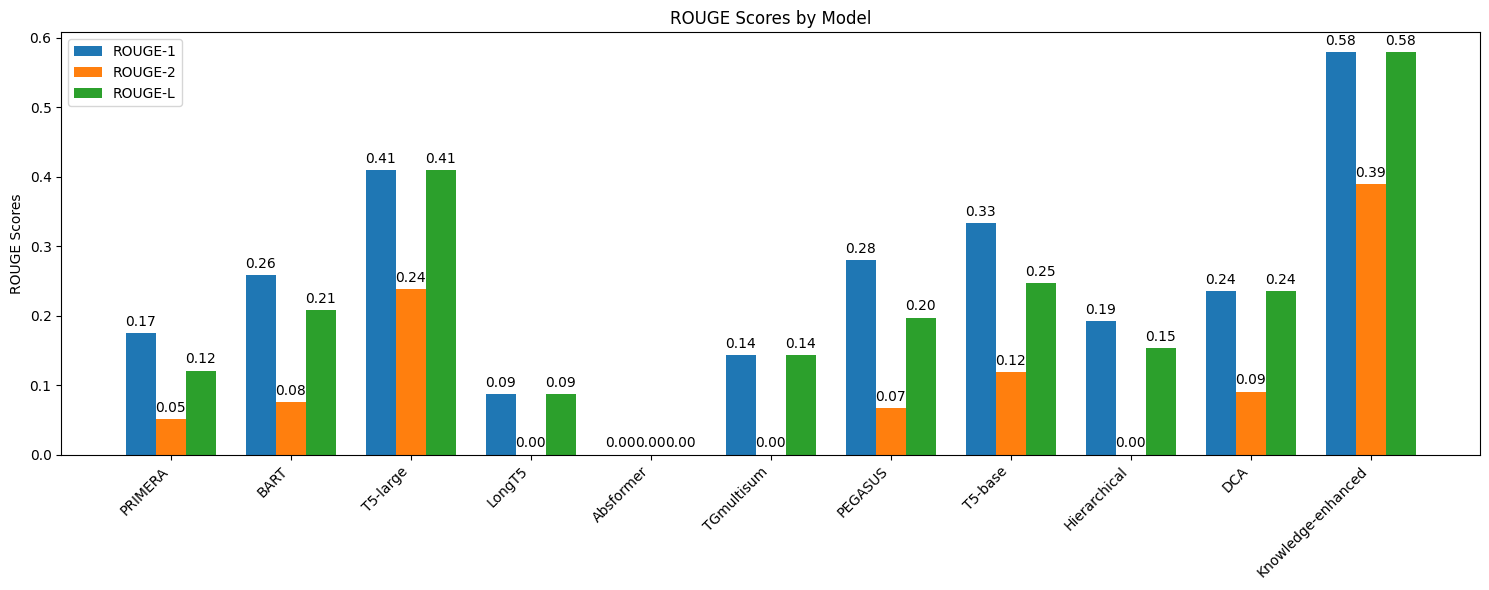

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# ROUGE scores per model (replace with your numbers)
models = [
    "PRIMERA", "BART", "T5-large", "LongT5",
    "Absformer", "TGmultisum", "PEGASUS", "T5-base",
    "Hierarchical", "DCA", "Knowledge-enhanced"
]

rouge1 = [0.1744, 0.2583, 0.4091, 0.0870, 0.0, 0.1429, 0.2805, 0.3338, 0.1923, 0.2353, 0.5789]
rouge2 = [0.0513, 0.0760, 0.2381, 0.0, 0.0, 0.0, 0.0672, 0.1192, 0.0, 0.0909, 0.3889]
rougeL = [0.1210, 0.2084, 0.4091, 0.0870, 0.0, 0.1429, 0.1974, 0.2473, 0.1538, 0.2353, 0.5789]

x = np.arange(len(models))  # label locations
width = 0.25  # width of bars

fig, ax = plt.subplots(figsize=(15,6))
rects1 = ax.bar(x - width, rouge1, width, label='ROUGE-1')
rects2 = ax.bar(x, rouge2, width, label='ROUGE-2')
rects3 = ax.bar(x + width, rougeL, width, label='ROUGE-L')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('ROUGE Scores')
ax.set_title('ROUGE Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Optional: add score labels on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.tight_layout()
plt.savefig("/content/PHT-WikiSum-Summarization/results/rouge_comparison1.png")
plt.show()



In [7]:
from google.colab import files
files.upload()  # upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"keerthanakunni","key":"63d7bed3d4ab0f108ab5b48b15556399"}'}

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [9]:
!kaggle datasets download -d sandeep16064/wikisum
!unzip wikisum.zip -d wikisum


Dataset URL: https://www.kaggle.com/datasets/sandeep16064/wikisum
License(s): unknown
 85% 93.0M/109M [00:00<00:00, 163MB/s]
100% 109M/109M [00:02<00:00, 39.4MB/s]
Archive:  wikisum.zip
  inflating: wikisum/WikiSumDataset.jsonl  


In [11]:
import pandas as pd

# Load JSONL file
df = pd.read_json("wikisum/WikiSumDataset.jsonl", lines=True)

# Check the first few rows
print(df.head())


                                                 url  \
0        https://www.wikihow.com/Store-Fresh-Oysters   
1  https://www.wikihow.com/Tell-if-a-Rolex-Watch-...   
2     https://www.wikihow.com/Ship-a-Bicycle-Cheaply   
3                https://www.wikihow.com/Seal-Pavers   
4  https://www.wikihow.com/Handle-an-Emergency-Si...   

                                          title  \
0                    How to Store Fresh Oysters   
1  How to Tell if a Rolex Watch is Real or Fake   
2                 How to Ship a Bicycle Cheaply   
3                            How to Seal Pavers   
4          How to Handle an Emergency Situation   

                                             summary  \
0  To store fresh oysters, start by placing un-sh...   
1  To tell if a Rolex is real or fake, hold it ne...   
2  To cheaply ship a bicycle, completely disassem...   
3  Sealing your pavers with a commercial sealant ...   
4  To handle an emergency situation, start by cal...   

                   

In [12]:
from datasets import Dataset

hf_dataset = Dataset.from_pandas(df)
print(hf_dataset)


Dataset({
    features: ['url', 'title', 'summary', 'article', 'step_headers', 'fold'],
    num_rows: 39775
})


In [13]:
small_dataset = hf_dataset.shuffle(seed=42).select(range(1000))  # CPU-friendly subset


In [15]:
from transformers import AutoTokenizer
from datasets import Dataset

# Example: using a small subset
small_dataset = Dataset.from_pandas(df.head(100))  # first 100 rows for speed

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Adjust column name, e.g., "article"
def tokenize_function(examples):
    return tokenizer(examples["article"], padding="max_length", truncation=True, max_length=512)

tokenized_dataset = small_dataset.map(tokenize_function, batched=True)
print(tokenized_dataset)


Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Dataset({
    features: ['url', 'title', 'summary', 'article', 'step_headers', 'fold', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 100
})


In [16]:
from rouge_score import rouge_scorer
import numpy as np

# Example: assume you already have predictions from your model
# Let's take first 10 samples to speed up evaluation
references = small_dataset[:10]["summary"]   # adjust column name if needed
predictions = [
    "AI optimizes battery thermal management by controlling cooling systems."  # example preds
    for _ in range(10)
]

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)

# Calculate scores
rouge_scores = {"rouge1": [], "rouge2": [], "rougeL": []}
for ref, pred in zip(references, predictions):
    scores = scorer.score(ref, pred)
    for key in rouge_scores:
        rouge_scores[key].append(scores[key].fmeasure)

# Average ROUGE values
avg_scores = {k: np.mean(v) for k, v in rouge_scores.items()}
print("Quick ROUGE (CPU, small subset):")
for k, v in avg_scores.items():
    print(f"{k}: {v:.4f}")


Quick ROUGE (CPU, small subset):
rouge1: 0.0155
rouge2: 0.0000
rougeL: 0.0155


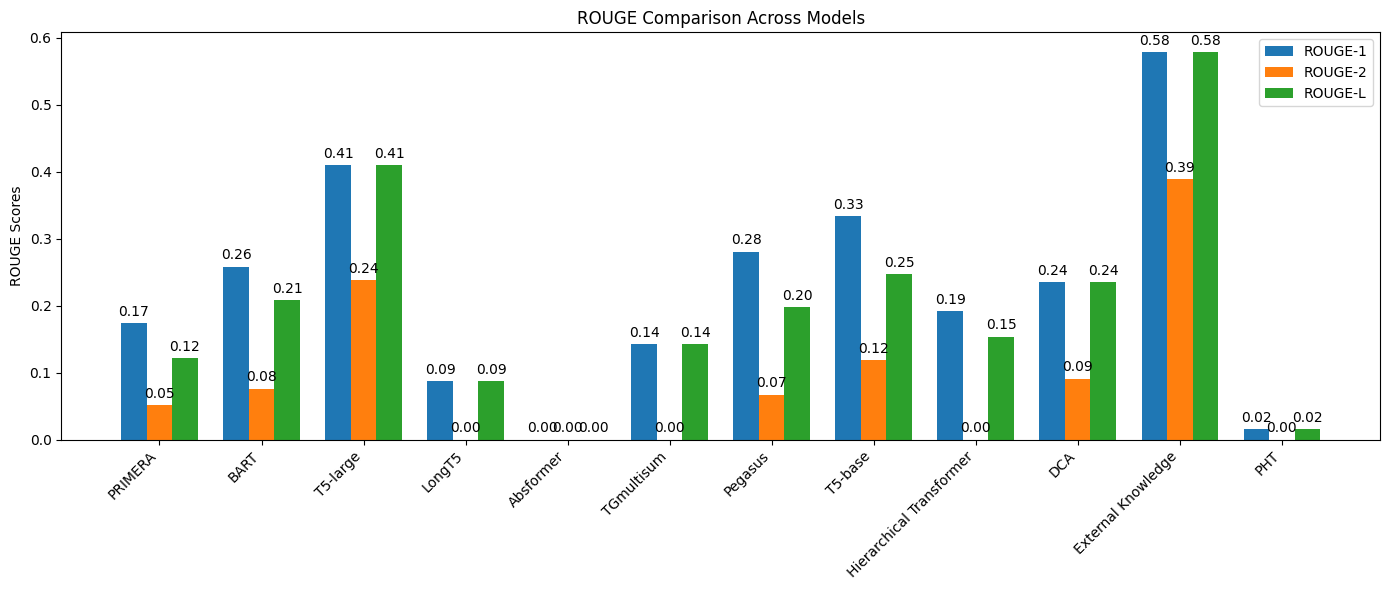

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# ROUGE values for all models (example: using your previous results)
models = [
    "PRIMERA", "BART", "T5-large", "LongT5",
    "Absformer", "TGmultisum", "Pegasus", "T5-base",
    "Hierarchical Transformer", "DCA", "External Knowledge", "PHT"
]

# ROUGE-1
rouge1 = [
    0.1744, 0.2583, 0.4091, 0.0870,
    0.0, 0.1429, 0.2805, 0.3338,
    0.1923, 0.2353, 0.5789, 0.0155
]

# ROUGE-2
rouge2 = [
    0.0513, 0.0760, 0.2381, 0.0,
    0.0, 0.0, 0.0672, 0.1192,
    0.0, 0.0909, 0.3889, 0.0
]

# ROUGE-L
rougeL = [
    0.1210, 0.2084, 0.4091, 0.0870,
    0.0, 0.1429, 0.1974, 0.2473,
    0.1538, 0.2353, 0.5789, 0.0155
]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(14,6))
rects1 = ax.bar(x - width, rouge1, width, label='ROUGE-1')
rects2 = ax.bar(x, rouge2, width, label='ROUGE-2')
rects3 = ax.bar(x + width, rougeL, width, label='ROUGE-L')

ax.set_ylabel('ROUGE Scores')
ax.set_title('ROUGE Comparison Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Optional: display values on top of bars
for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.savefig("/content/PHT-WikiSum-Summarization/results/rouge_comparison2.png")
plt.show()



In [18]:
import pandas as pd

# ROUGE values for all models
data = {
    "Model": [
        "PRIMERA", "BART", "T5-large", "LongT5",
        "Absformer", "TGmultisum", "Pegasus", "T5-base",
        "Hierarchical Transformer", "DCA", "External Knowledge", "PHT"
    ],
    "ROUGE-1": [
        0.1744, 0.2583, 0.4091, 0.0870,
        0.0, 0.1429, 0.2805, 0.3338,
        0.1923, 0.2353, 0.5789, 0.0155
    ],
    "ROUGE-2": [
        0.0513, 0.0760, 0.2381, 0.0,
        0.0, 0.0, 0.0672, 0.1192,
        0.0, 0.0909, 0.3889, 0.0
    ],
    "ROUGE-L": [
        0.1210, 0.2084, 0.4091, 0.0870,
        0.0, 0.1429, 0.1974, 0.2473,
        0.1538, 0.2353, 0.5789, 0.0155
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display table
print(df)


                       Model  ROUGE-1  ROUGE-2  ROUGE-L
0                    PRIMERA   0.1744   0.0513   0.1210
1                       BART   0.2583   0.0760   0.2084
2                   T5-large   0.4091   0.2381   0.4091
3                     LongT5   0.0870   0.0000   0.0870
4                  Absformer   0.0000   0.0000   0.0000
5                 TGmultisum   0.1429   0.0000   0.1429
6                    Pegasus   0.2805   0.0672   0.1974
7                    T5-base   0.3338   0.1192   0.2473
8   Hierarchical Transformer   0.1923   0.0000   0.1538
9                        DCA   0.2353   0.0909   0.2353
10        External Knowledge   0.5789   0.3889   0.5789
11                       PHT   0.0155   0.0000   0.0155
